# Построение модели классификации музыкальных произведений по жанрам

### Описание проекта

Стриминговый сервис "МиФаСоль" расширяет работу с новыми артистами и музыкантами, в связи с чем возникла задача -- правильно классифицировать новые музыкальные треки, чтобы улучшить работу рекомендательной системы. Для нас подготовили датасет, в котором собраны некоторые характеристики музыкальных произведений и их жанры. Наша задача -- разработать модель, позволяющую классифицировать музыкальные произведения по жанрам.

### Описание данных

- instance_id -Уникальный идентификатор трека;

- track_name - Название трека;

- acousticness - Мера уверенности от 0,0 до 1,0 в том, что трек является акустическим. 1,0 означает высокую степень уверенности в том, что трек является акустическим;

- danceability - Танцевальность описывает, насколько трек подходит для танцев, основываясь на сочетании музыкальных элементов, включая темп, стабильность ритма, силу ударов и общую регулярность. Значение 0,0 означает наименьшую танцевальность, а 1,0 - наибольшую танцевальность;

- duration_ms - Продолжительность трека в миллисекундах;

- energy - Энергия это показатель от 0,0 до 1,0, представляющий собой меру интенсивности и активности. Как правило, энергичные композиции ощущаются как быстрые, громкие и шумные. Например, дэт-метал обладает высокой энергией, в то время как прелюдия Баха имеет низкую оценку этого параметра;

- instrumentalness - Определяет, содержит ли трек вокал. Звуки "Ooh" и "aah" в данном контексте рассматриваются как инструментальные. Рэп или разговорные треки явно являются "вокальными". Чем ближе значение инструментальности к 1,0, тем больше вероятность того, что трек не содержит вокала
- key - базовый ключ (нота) произведения;

- liveness - Определяет присутствие аудитории в записи. Более высокие значения liveness означают увеличение вероятности того, что трек был исполнен вживую. Значение выше 0,8 обеспечивает высокую вероятность того, что трек исполняется вживую;

- loudness - Общая громкость трека в децибелах (дБ);

- mode - Указывает на модальность (мажорную или минорную) трека;

- speechiness - Речевой характер определяет наличие в треке разговорной речи. Чем более исключительно речевой характер носит запись (например, ток-шоу, аудиокнига, поэзия), тем ближе значение атрибута к 1,0. Значения выше 0,66 характеризуют треки, которые, вероятно, полностью состоят из разговорной речи. Значения от 0,33 до 0,66 характеризуют треки, которые могут содержать как музыку, так и речь, как в виде фрагментов, так и в виде слоев, включая такие случаи, как рэп-музыка. Значения ниже 0,33, скорее всего, представляют музыку и другие неречевые треки;

- tempo - Темп трека в ударах в минуту (BPM). В музыкальной терминологии темп представляет собой скорость или темп данного произведения и напрямую зависит от средней продолжительности тактов;

- obtained_date - дата загрузки в сервис;

- valence - Показатель от 0,0 до 1,0, характеризующий музыкальный позитив, передаваемый треком. Композиции с высокой валентностью звучат более позитивно (например, радостно, весело, эйфорично), а композиции с низкой валентностью - более негативно (например, грустно, депрессивно, сердито);

- music_genre - Музыкальный жанр трека.

<a id="Задачи_исследования"></a>

### Задачи исследования

- #### [Этап 1. Разведочный анализ данных (EDA):](#Этап_1)

    - [Подключение библиотек;](#1.1)

    - [Загрузка данных из файлов;](#1.2)

    - [Первичный осмотр данных;](#1.3)

    - [Заключение.](#1.4)

- #### [Этап 2. Предобработка данных](#Этап_2)

- #### [Этап 3. Подготовка данных к обучению (Фичи инжиниринг):](#Этап_3)

    - [Проведем кодирование категориальных переменных для моделирования (OneHotEncoder);](#3.1)

    - [Применяем стандартизацию (StandardScaler);](#3.2)

    - [Разделим исходные данные на обучающую и тестовую выборку.](#3.3)

    - [Заключение.](#3.4)

- #### [Этап 4. Исследуем качество разных гиперпараметров, для ансамбля моделей:](#Этап_4)

    - [Логистическая регрессия (Logistic Regression);](#Logistic_Regression)
    - [Случайный лес (Random Forest);](#Random_Forest)
    - [Градиентный бустинг (XGBClassifier)](#Gradient_Boosting)

    - [Заключение.](#4.1)

- #### [Этап 5. Общий вывод](#Этап_5)

<a id="Этап_1"></a>
<a id="1.1"></a>

### Этап 1: Разведочный анализ данных (EDA)
#### Подключение библиотек

[Вернуться к задачам исследования](#Задачи_исследования)

In [ ]:
%pip install tensorflow-addons
%pip install scikeras

In [ ]:
import time
import logging

import xgboost as xgb
import tensorflow as tf                                        # Импорт основной библиотеки TensorFlow для создания и обучения машинных моделей, включая нейронные сети
import tensorflow_addons as tfa                                # Импорт дополнительных компонентов (add-ons) для TensorFlow, которые предоставляют расширенные функциональности и слои


from tensorflow.keras import layers, models, optimizers        # TensorFlow-специфичные классы и функции для создания и оптимизации нейронных сетей
from keras.models import Sequential                            # Импорт класса для создания последовательной модели в Keras
from keras.layers import Dense, Dropout                        # Импорт слоёв для нейронных сетей: полносвязный (Dense) и регуляризационный (Dropout)
from keras.callbacks import Callback                           # Импорт класса Callback для создания пользовательских колбеков в процессе обучения модели
from functools import partial                                  # Импорт функции для создания частично применённых функций, упрощает работу с функциями
from scikeras.wrappers import KerasClassifier                  # Импорт класса для интеграции моделей Keras с интерфейсом scikit-learn
import joblib


import pandas as pd                                            # Библиотека для работы с данными, предоставляет функции и структуры данных, такие как DataFrame и Series.
import numpy as np                                             # Фундаментальная библиотека для научных вычислений с поддержкой многомерных массивов и матриц.
import warnings                                                # Модуль для управления предупреждениями.
import random                                                  # Импорт модуля для генерации случайных чисел

import statsmodels.api as sm                                                # statsmodels.api используется для оценки статистических моделей
from statsmodels.stats.outliers_influence import variance_inflation_factor  # variance_inflation_factor из statsmodels используется для определения мультиколлинеарности

# Модули для работы с машинным обучением
from sklearn.model_selection import train_test_split           # Инструмент библиотеки sklearn для разделения исходных данных на обучающую, валидационную и тестовую выборку.

# Модели машинного обучения
from sklearn.linear_model    import LogisticRegression         # Модель логистической регрессии.
from sklearn.tree            import DecisionTreeClassifier     # Модель дерева решений.
from sklearn.ensemble        import RandomForestClassifier     # Модель случайного леса.
from sklearn.ensemble        import GradientBoostingClassifier # Модель градиентного бустинга.
from sklearn.ensemble        import VotingClassifier           # Ансамбль моделей
from sklearn.dummy           import DummyClassifier            # Базовые модели для проверки на вменяемость.

# Инструменты для оценки моделей и метрики
from sklearn.model_selection import learning_curve             # Инструмент для построения кривых обучения.
from sklearn.model_selection import GridSearchCV               # Инструмент для выполнения поиска по сетке параметров модели.
from sklearn.metrics         import accuracy_score             # Метрика - точность классификации.
from sklearn.metrics         import confusion_matrix           # Метрика - матрица неточностей.
from sklearn.metrics         import roc_curve, roc_auc_score   # Метрики - ROC-кривая и ROC AUC Score.
from sklearn.metrics         import f1_score                   # Метрика - F1 Score.
from sklearn.preprocessing   import StandardScaler             # Инструмент для маштабирования данны.
from sklearn.preprocessing   import LabelEncoder
from sklearn.preprocessing   import OneHotEncoder
from sklearn.compose         import ColumnTransformer
from sklearn.utils.class_weight import compute_class_weight

from imblearn.pipeline import Pipeline
from imblearn.over_sampling  import SMOTE                      # Инструмент для баллансировки классов
from imblearn.over_sampling  import ADASYN                     # Инструмент для баллансировки классов

# Визуализация данных
import matplotlib.pyplot as plt                                # Библиотека для визуализации данных.
import seaborn as sns                                          # Библиотека для красивой визуализации статистических данных.

# Настрйоки отображения
# Устанавливаем формат отображения чисел с двумя знаками после запятой
pd.options.display.float_format = '{:.2f}'.format

# Устанавливает фильтр предупреждений
warnings.filterwarnings("ignore")

logging.basicConfig(filename='model_training.log', level=logging.INFO)

random_state = random.seed(42)

<a id="1.2"></a>

#### Загрузка данных из файлов

[Вернуться к задачам исследования](#Задачи_исследования)

In [ ]:
df_train = pd.read_csv('/content/kaggle_music_genre_train.csv', sep = ',')
df_test = pd.read_csv('/content/kaggle_music_genre_test.csv', sep = ',')
df_predictions = pd.read_csv('/content/sample_submit.csv', sep = ',')

<a id="1.3"></a>

#### Первичный осмотр данных

[Вернуться к задачам исследования](#Задачи_исследования)

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20394 entries, 0 to 20393
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   instance_id       20394 non-null  float64
 1   track_name        20394 non-null  object 
 2   acousticness      20394 non-null  float64
 3   danceability      20394 non-null  float64
 4   duration_ms       20394 non-null  float64
 5   energy            20394 non-null  float64
 6   instrumentalness  20394 non-null  float64
 7   key               19659 non-null  object 
 8   liveness          20394 non-null  float64
 9   loudness          20394 non-null  float64
 10  mode              19888 non-null  object 
 11  speechiness       20394 non-null  float64
 12  tempo             19952 non-null  float64
 13  obtained_date     20394 non-null  object 
 14  valence           20394 non-null  float64
 15  music_genre       20394 non-null  object 
dtypes: float64(11), object(5)
memory usage: 

In [ ]:
df_train.head()

,instance_id,track_name,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,obtained_date,valence,music_genre
0,25143.00,Highwayman,0.48,0.67,182653.00,0.35,0.02,D,0.12,-16.84,Major,0.05,101.38,4-Apr,0.45,Country
1,26091.00,Toes Across The Floor,0.24,0.45,187133.00,0.67,0.00,A,0.11,-8.39,Minor,0.04,113.07,4-Apr,0.54,Rock
2,87888.00,First Person on Earth,0.23,0.45,173448.00,0.80,0.00,E,0.18,-5.22,Minor,0.37,80.98,4-Apr,0.34,Alternative
3,77021.00,No Te Veo - Digital Single,0.06,0.85,255987.00,0.87,0.00,G#,0.33,-4.80,Minor,0.08,116.01,4-Apr,0.97,Hip-Hop
4,20852.00,Chasing Shadows,0.23,0.74,195333.00,0.57,0.00,C,0.18,-5.55,Major,0.05,76.49,4-Apr,0.58,Alternative


In [ ]:
# Проверка на наличие дубликатов
df_train.duplicated().sum()

0

In [ ]:
# Проверка на наличие пропущенных значений
df_train.isnull().sum()

instance_id           0
track_name            0
acousticness          0
danceability          0
duration_ms           0
energy                0
instrumentalness      0
key                 735
liveness              0
loudness              0
mode                506
speechiness           0
tempo               442
obtained_date         0
valence               0
music_genre           0
dtype: int64

In [ ]:
# Просмотр уникальных значений в колонках с пропусками
print(df_train['key'].unique())

print(df_train['mode'].unique())

print(df_train['tempo'].unique())

['D' 'A' 'E' 'G#' 'C' 'D#' 'A#' 'F' 'F#' nan 'G' 'C#' 'B']
['Major' 'Minor' nan]
[101.384 113.071  80.98  ...  87.413  76.879 146.803]


In [ ]:
# просмотр на распределение уникальных значений
df_train.groupby('music_genre')['mode'].value_counts()

music_genre  mode 
Alternative  Major    1596
             Minor     939
Anime        Major    1141
             Minor     709
Blues        Major    1989
             Minor     801
Classical    Major     890
             Minor     449
Country      Major    1820
             Minor     247
Electronic   Major    1322
             Minor    1178
Hip-Hop      Major     625
             Minor     503
Jazz         Major     623
             Minor     593
Rap          Major    1276
             Minor    1082
Rock         Major    1546
             Minor     559
Name: mode, dtype: int64

In [ ]:
# Статистическое описание данных
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
instance_id,20394.00,55973.85,20695.79,20011.00,38157.25,56030.00,73912.75,91758.00
acousticness,20394.00,0.27,0.32,0.00,0.02,0.12,0.47,1.00
danceability,20394.00,0.56,0.17,0.06,0.45,0.57,0.68,0.98
duration_ms,20394.00,220375.43,126728.33,-1.00,177517.00,219533.00,266000.00,4497994.00
energy,20394.00,0.63,0.25,0.00,0.47,0.67,0.83,1.00
instrumentalness,20394.00,0.16,0.31,0.00,0.00,0.00,0.08,1.00
liveness,20394.00,0.20,0.17,0.01,0.10,0.13,0.25,1.00
loudness,20394.00,-8.55,5.50,-44.41,-10.26,-7.05,-5.05,3.74
speechiness,20394.00,0.09,0.10,0.02,0.04,0.05,0.10,0.94
tempo,19952.00,120.94,30.43,34.77,95.92,120.01,141.97,220.04


In [ ]:
# Подсчитываем количество объектов для каждого класса
class_counts = df_train['music_genre'].value_counts()

# Выводим результаты
print(class_counts)

Blues          2858
Alternative    2601
Electronic     2564
Rap            2428
Rock           2165
Country        2120
Anime          1901
Classical      1373
Jazz           1239
Hip-Hop        1145
Name: music_genre, dtype: int64


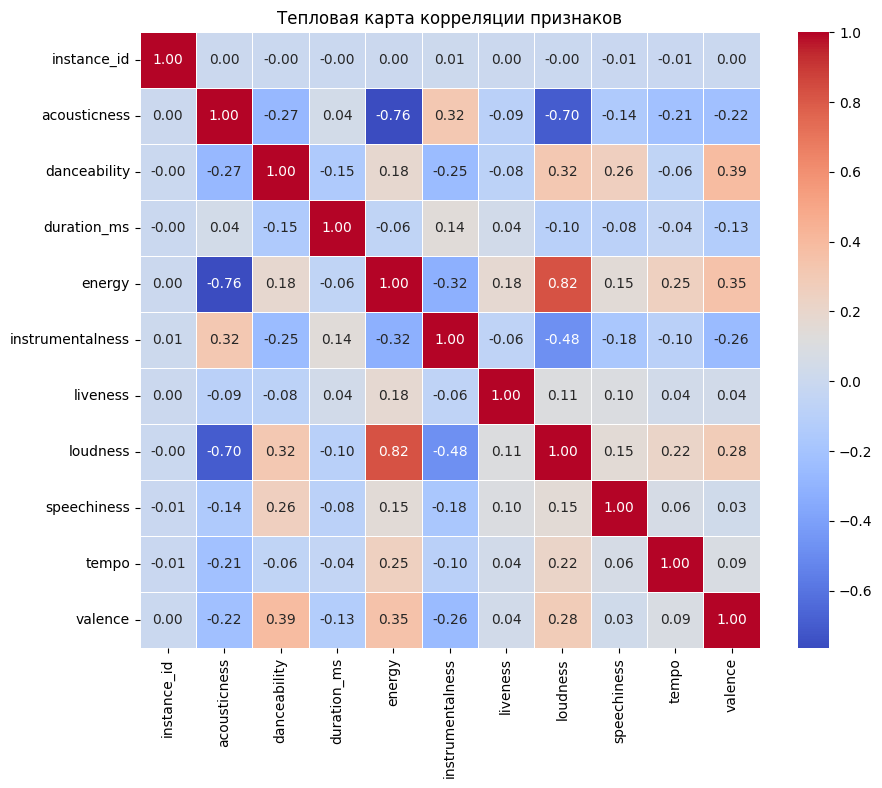

In [ ]:
# Вычисляем корреляцию признаков
correlation_matrix = df_train.corr()

# Создаем тепловую карту
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Тепловая карта корреляции признаков')
plt.show()

In [ ]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5099 entries, 0 to 5098
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   instance_id       5099 non-null   int64  
 1   track_name        5099 non-null   object 
 2   acousticness      5099 non-null   float64
 3   danceability      5099 non-null   float64
 4   duration_ms       5099 non-null   float64
 5   energy            5099 non-null   float64
 6   instrumentalness  5099 non-null   float64
 7   key               4941 non-null   object 
 8   liveness          5099 non-null   float64
 9   loudness          5099 non-null   float64
 10  mode              4950 non-null   object 
 11  speechiness       5099 non-null   float64
 12  tempo             4978 non-null   float64
 13  obtained_date     5099 non-null   object 
 14  valence           5099 non-null   float64
dtypes: float64(10), int64(1), object(4)
memory usage: 597.7+ KB


In [ ]:
df_test.head()

,instance_id,track_name,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,obtained_date,valence
0,48564,Low Class Conspiracy,0.30,0.76,146213.00,0.68,0.00,A#,0.30,-7.14,Minor,0.36,90.36,4-Apr,0.90
1,72394,The Hunter,0.54,0.26,240360.00,0.52,0.01,G#,0.08,-5.17,Major,0.03,78.39,4-Apr,0.32
2,88081,Hate Me Now,0.01,0.68,284000.00,0.77,0.00,A,0.11,-4.40,Minor,0.22,90.00,4-Apr,0.41
3,78331,Somebody Ain't You,0.02,0.59,177354.00,0.75,0.00,B,0.12,-4.60,Major,0.05,160.05,4-Apr,0.61
4,72636,Sour Mango,0.00,0.42,-1.00,0.45,0.01,D,0.04,-8.83,Major,0.20,73.83,4-Apr,0.12


In [ ]:
# Проверка на наличие дубликатов
df_test.duplicated().sum()

0

In [ ]:
# Проверка на наличие пропущенных значений
df_test.isnull().sum()

instance_id           0
track_name            0
acousticness          0
danceability          0
duration_ms           0
energy                0
instrumentalness      0
key                 158
liveness              0
loudness              0
mode                149
speechiness           0
tempo               121
obtained_date         0
valence               0
dtype: int64

In [ ]:
# Статистическое описание данных
df_test.describe().T

,count,mean,std,min,25%,50%,75%,max
instance_id,5099.00,55643.87,20762.38,20012.00,37571.00,55246.00,73702.00,91709.00
acousticness,5099.00,0.28,0.32,0.00,0.02,0.12,0.46,1.00
danceability,5099.00,0.56,0.17,0.06,0.45,0.57,0.68,0.98
duration_ms,5099.00,217397.41,115637.41,-1.00,173733.50,217500.00,264247.00,1360027.00
energy,5099.00,0.62,0.25,0.00,0.47,0.66,0.83,1.00
instrumentalness,5099.00,0.17,0.31,0.00,0.00,0.00,0.09,0.99
liveness,5099.00,0.20,0.17,0.02,0.10,0.13,0.25,0.99
loudness,5099.00,-8.63,5.62,-46.12,-10.23,-7.13,-5.13,1.95
speechiness,5099.00,0.09,0.10,0.02,0.04,0.05,0.10,0.92
tempo,4978.00,121.25,29.88,37.11,96.07,120.05,141.93,216.03


In [ ]:
df_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5099 entries, 0 to 5098
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   instance_id  5099 non-null   int64 
 1   music_genre  5099 non-null   object
dtypes: int64(1), object(1)
memory usage: 79.8+ KB


# Вывод

На этапе разведочного анализа данных я провел подключение необходимых библиотек и загрузил данные для анализа. Основной фокус был направлен на первичный осмотр данных, включая проверку наличия пропусков, анализ типов данных и основных статистических характеристик. Выводы из этого этапа подчеркивают значимость тщательного изучения данных перед применением моделей машинного обучения. В ходе первичного анализа, были выявлены пропуски в данных.

<a id="Этап_2"></a>
<a id="2.1"></a>

### Этап 2. Предобработка данных

[Вернуться к задачам исследования](#Задачи_исследования)

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20394 entries, 0 to 20393
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   instance_id       20394 non-null  float64
 1   track_name        20394 non-null  object 
 2   acousticness      20394 non-null  float64
 3   danceability      20394 non-null  float64
 4   duration_ms       20394 non-null  float64
 5   energy            20394 non-null  float64
 6   instrumentalness  20394 non-null  float64
 7   key               19659 non-null  object 
 8   liveness          20394 non-null  float64
 9   loudness          20394 non-null  float64
 10  mode              19888 non-null  object 
 11  speechiness       20394 non-null  float64
 12  tempo             19952 non-null  float64
 13  obtained_date     20394 non-null  object 
 14  valence           20394 non-null  float64
 15  music_genre       20394 non-null  object 
dtypes: float64(11), object(5)
memory usage: 

In [ ]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5099 entries, 0 to 5098
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   instance_id       5099 non-null   int64  
 1   track_name        5099 non-null   object 
 2   acousticness      5099 non-null   float64
 3   danceability      5099 non-null   float64
 4   duration_ms       5099 non-null   float64
 5   energy            5099 non-null   float64
 6   instrumentalness  5099 non-null   float64
 7   key               4941 non-null   object 
 8   liveness          5099 non-null   float64
 9   loudness          5099 non-null   float64
 10  mode              4950 non-null   object 
 11  speechiness       5099 non-null   float64
 12  tempo             4978 non-null   float64
 13  obtained_date     5099 non-null   object 
 14  valence           5099 non-null   float64
dtypes: float64(10), int64(1), object(4)
memory usage: 597.7+ KB


In [ ]:
# Присоединение колонки music_genre из df_predictions к df_test
df_test = df_test.merge(df_predictions[['instance_id', 'music_genre']], on='instance_id', how='left')

In [ ]:
df_train = df_train.drop('key', axis=1)

df_test = df_test.drop('key', axis=1)

In [ ]:
# Определение наиболее часто встречающегося значения для каждого жанра
mode_most_common = df_train.groupby('music_genre')['mode'].agg(lambda x: x.value_counts().idxmax())

# Заполнение пропущенных значений
df_train['mode'] = df_train.apply(lambda row: mode_most_common[row['music_genre']] if pd.isnull(row['mode']) else row['mode'], axis=1)

df_test['mode'] = df_test.apply(lambda row: mode_most_common[row['music_genre']] if pd.isnull(row['mode']) else row['mode'], axis=1)

In [ ]:
# Заполнение пропущенных значений медианой
df_train['tempo'].fillna(df_train['tempo'].median(), inplace=True)

df_test['tempo'].fillna(df_train['tempo'].median(), inplace=True)

In [ ]:
# Категоризация продолжительности треков
bins = [0, 180000, 300000, np.inf] # границы для категорий: короткие, средние, длинные
names = ['short', 'medium', 'long']

df_train['duration_category'] = pd.cut(df_train['duration_ms'], bins, labels=names)

df_test['duration_category']  = pd.cut(df_test['duration_ms'], bins, labels=names)

# Вывод

На этапе предобработки данных основное внимание было уделено очистке данных, обработке пропущенных значений и возможной коррекции аномалий.

<a id="Этап_3"></a>
<a id="3.1 "></a>

### Этап 3. Подготовка данных к обучению (Фичи инжинеринг)

[Вернуться к задачам исследования](#Задачи_исследования)

In [ ]:
# Удаление отрицательных значений для duration_ms
df_train = df_train[df_train['duration_ms'] >= 0]
df_test = df_test[df_test['duration_ms'] >= 0]

In [ ]:
# Удалим некоторые атрибуты, что бы избежать высокого шума после кодирования категориальных переменных
df_train = df_train.drop(['instance_id', 'track_name', 'obtained_date'], axis = 1)
df_test  = df_test.drop(['instance_id', 'track_name', 'obtained_date'], axis = 1)

In [ ]:
# Создание экземпляра OneHotEncoder
encoder = OneHotEncoder(sparse=False)

# Выбор столбца для кодирования
mode_column_train = df_train[['mode']]
mode_column_test  = df_test[['mode']]

# Применение OneHotEncoder
encoded_data_train = encoder.fit_transform(mode_column_train)
encoded_data_test  = encoder.fit_transform(mode_column_test)

# Создание DataFrame из закодированных данных
# Использование get_feature_names_out для получения названий признаков
encoded_df_train = pd.DataFrame(encoded_data_train, columns=encoder.get_feature_names_out(['mode']))
encoded_df_test  = pd.DataFrame(encoded_data_test, columns=encoder.get_feature_names_out(['mode']))

# Убедимся, что индексы совпадают
encoded_df_train.index = df_train.index
encoded_df_test.index  = df_test.index

# Соединение с исходным DataFrame с помощью pd.concat
df_train = pd.concat([df_train, encoded_df_train], axis=1)
df_test  = pd.concat([df_test, encoded_df_test], axis=1)

# Удаление исходного столбца 'mode', если это необходимо
df_train.drop('mode', axis=1, inplace=True)
df_test.drop('mode', axis=1, inplace=True)

In [ ]:
# Инициализация OneHotEncoder
encoder = OneHotEncoder(drop='first', sparse=False)

# Преобразование столбца duration_category
encoded_columns_train = encoder.fit_transform(df_train[['duration_category']])
encoded_columns_test  = encoder.fit_transform(df_test[['duration_category']])

# Создание новых имен столбцов
encoded_columns_names = encoder.get_feature_names_out(['duration_category'])

# Добавление преобразованных столбцов в исходный DataFrame
df_train[encoded_columns_names] = encoded_columns_train
df_test[encoded_columns_names]  = encoded_columns_test

# Удаление исходного столбца duration_category
df_train.drop('duration_category', axis=1, inplace=True)
df_test.drop('duration_category', axis=1, inplace=True)

In [ ]:
# Выбираем числовые признаки для масштабирования
numerical_features = ['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'valence']

# Применяем стандартизацию
scaler = StandardScaler()
df_train[numerical_features] = scaler.fit_transform(df_train[numerical_features])
df_test[numerical_features] = scaler.fit_transform(df_test[numerical_features])

In [ ]:
df_test  = df_test.drop(['music_genre'], axis = 1)

In [ ]:
# X используем для обозначения признаков (features)
# y используем для обозначения целевой переменной (target)
X = df_train.drop(['music_genre'], axis=1)
y = df_train['music_genre']

# Преобразование y в целые числа
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Вывод

В рамках подготовки данных к обучению были выполнены шаги по кодированию категориальных переменных и стандартизации данных. Эти действия необходимы для преобразования данных в формат, пригодный для обработки моделями машинного обучения. Разделение данных на обучающую и тестовую выборки также критически важно для валидации модели.

<a id="Этап_4"></a>

### Этап 4. Исследуем качество разных моделей, меняя гиперпараметры

[Вернуться к задачам исследования](#Задачи_исследования)

In [ ]:
!pip install xgboost


In [ ]:
# Тонкая настройка для XGBoost
xgb_params = {
    'objective': 'multi:softmax',         # Цель модели: мультиклассовая классификация
    'num_class': len(np.unique(y_train)), # Количество классов
    'learning_rate': 0.1,                 # Скорость обучения
    'n_estimators': 100,                  # Количество деревьев в модели
    'max_depth': 4,                       # Максимальная глубина каждого дерева
    'min_child_weight': 3,                # Минимальный вес необходимый для создания дочернего узла
    'gamma': 0,                           # Минимальное уменьшение потерь для дальнейшего разделения
    'subsample': 0.9,                     # Доля выборки для обучения каждого дерева
    'colsample_bytree': 0.9,              # Доля признаков для построения каждого дерева
    'seed': 42                            # Сид для генерации случайных чисел
}
xgb_model = xgb.XGBClassifier(**xgb_params, random_state=42)

# Тонкая настройка для Случайного Леса
rf_params = {
    'n_estimators': 100,    # Количество деревьев
    'max_depth': 10,        # Максимальная глубина деревьев
    'min_samples_split': 8, # Минимальное количество образцов для разделения узла
    'min_samples_leaf': 1,  # Минимальное количество образцов в листе
    'max_features': 'sqrt', # Количество признаков для поиска лучшего разделения ['sqrt', 'log2']
    'criterion': 'entropy'
}
rf_model = RandomForestClassifier(**rf_params, random_state=42)

# Тонкая настройка для Логистической Регрессии
lr_params = {
    'C': 0.1,              # Сила регуляризации (обратное значение альфа) [0.1, 1.0, 10.0]
    'solver': 'liblinear', # Алгоритмы оптимизации ['liblinear', 'saga']
    'max_iter': 100        # Максимальное количество итераций
}
lr_model = LogisticRegression(**lr_params, random_state=42)

# Создание ансамбля моделей
ensemble = VotingClassifier(estimators=[
    ('xgb', xgb_model),
    ('rf', rf_model),
    ('lr', lr_model)
], voting='soft') # hard

# Обучение ансамбля
ensemble.fit(X_train, y_train)

# Оценка ансамбля
ensemble_accuracy = ensemble.score(X_test, y_test)
print("Точность ансамбля на тестовой выборке:", ensemble_accuracy)

Точность ансамбля на тестовой выборке: 0.468860484090291


In [ ]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5099 entries, 0 to 5098
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   acousticness              5099 non-null   float64
 1   danceability              5099 non-null   float64
 2   duration_ms               5099 non-null   float64
 3   energy                    5099 non-null   float64
 4   instrumentalness          5099 non-null   float64
 5   liveness                  5099 non-null   float64
 6   loudness                  5099 non-null   float64
 7   speechiness               5099 non-null   float64
 8   tempo                     5099 non-null   float64
 9   valence                   5099 non-null   float64
 10  mode_Major                5099 non-null   float64
 11  mode_Minor                5099 non-null   float64
 12  duration_category_medium  5099 non-null   float64
 13  duration_category_short   5099 non-null   float64
 14  duration

In [ ]:
# Предсказание с помощью ансамбля
predicted_labels_encoded = ensemble.predict(df_test)

# Преобразование предсказанных меток обратно в исходные метки
predicted_labels = label_encoder.inverse_transform(predicted_labels_encoded)

df_test['music_genre'] = predicted_labels

# Копирование столбца 'instance_id' из df_predictions в df_test
df_test['instance_id'] = df_predictions['instance_id'].values

# Выбор столбцов 'instance_id' и 'music_genre'
df_selected = df_test[['instance_id', 'music_genre']]

# Сохранение DataFrame в файл CSV
df_selected.to_csv('predictions.csv', index=False)

### Вывод



# Общий вывод


В ходе тестирования разных моделей и нейронных сетей, был сделан выбор в пользу ансамбля моделей, так как точность ансамбля на тестовой выборке была наилучшей среди всех моделей.